In [1]:
# Import tensorflow and load 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.preprocessing.image import ImageDataGenerator

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Loading the Dataset.
train_dataset = tf.keras.utils.image_dataset_from_directory( '/content/drive/MyDrive/Group_Project_Data/Train', image_size=(64,64), batch_size=256,
    color_mode='grayscale'
)
train_dataset = train_dataset.map(lambda x,y: (x/255, y))

val_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Group_Project_Data/Valid', image_size=(64,64), batch_size=256,
    color_mode='grayscale'
)
val_dataset = val_dataset.map(lambda x,y: (x/255, y))

# Unpack image/data and labels/targets
X_train, y_train = next(iter(train_dataset))
X_test, y_test = next(iter(val_dataset))

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


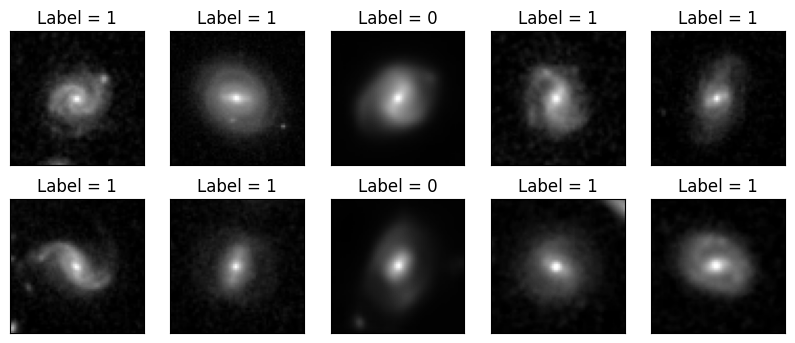

In [4]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5, figsize=(10, 4))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(X_train[i,:,:], cmap='gray')
    ax[i].set_title(f'Label = {y_train[i]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [5]:
### Create the layers for the CNN model, using the Functional API
# Input, Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras import layers, models

Inp = layers.Input((64,64,1), dtype='float32', name='Model_Input')
Conv1 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_1')(Inp)
Pool1 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_1')(Conv1)
Conv2 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_2')(Pool1)
Pool2 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_2')(Conv2)
Conv3 = layers.Conv2D(64, (3,3), activation='relu',
                      padding='same', name='conv_3')(Pool2)
Pool3 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_3')(Conv3)
Flat = layers.Flatten()(Pool3)
Dense1 = layers.Dense(64, activation='relu', name='fc_1')(Flat)
Dense2 = layers.Dense(1, activation='sigmoid', name='fc_2')(Dense1)

In [6]:
### Create the model, using the input and output tensors you have define above.
### Display the model summary.
# models.Model

galaxy_model = models.Model(inputs=Inp, outputs=Dense2)
galaxy_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Model_Input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 64)        18496     
                                                                 
 pool_3 (MaxPooling2D)       (None, 8, 8, 64)          0     

In [7]:
### Compile the model with the Adam optimizer, Sparse Categorical Crossentropy
### loss (from_logits=True), and the accuracy metric
# optimizers.Adam, losses.SparseCategoricalCrossentropy
from tensorflow.keras import losses, optimizers

galaxy_model.compile(optimizer=optimizers.Adam(),
                    loss=losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

In [8]:
history = galaxy_model.fit(x=X_train, y=y_train, epochs=25,
                          validation_data=(X_test, y_test),
                          batch_size=512)

Epoch 1/25
1/1 [==============================] - 12s 12s/step - loss: 0.6930 - accuracy: 0.5234 - val_loss: 0.6880 - val_accuracy: 0.4844
Epoch 2/25
1/1 [==============================] - 0s 57ms/step - loss: 0.6863 - accuracy: 0.5117 - val_loss: 0.6805 - val_accuracy: 0.4844
Epoch 3/25
1/1 [==============================] - 0s 53ms/step - loss: 0.6775 - accuracy: 0.5117 - val_loss: 0.6691 - val_accuracy: 0.4844
Epoch 4/25
1/1 [==============================] - 0s 53ms/step - loss: 0.6644 - accuracy: 0.5117 - val_loss: 0.6517 - val_accuracy: 0.4844
Epoch 5/25
1/1 [==============================] - 0s 55ms/step - loss: 0.6458 - accuracy: 0.5117 - val_loss: 0.6261 - val_accuracy: 0.5234
Epoch 6/25
1/1 [==============================] - 0s 55ms/step - loss: 0.6205 - accuracy: 0.5352 - val_loss: 0.5916 - val_accuracy: 0.8828
Epoch 7/25
1/1 [==============================] - 0s 54ms/step - loss: 0.5859 - accuracy: 0.8906 - val_loss: 0.5483 - val_accuracy: 0.9727
Epoch 8/25
1/1 [===========

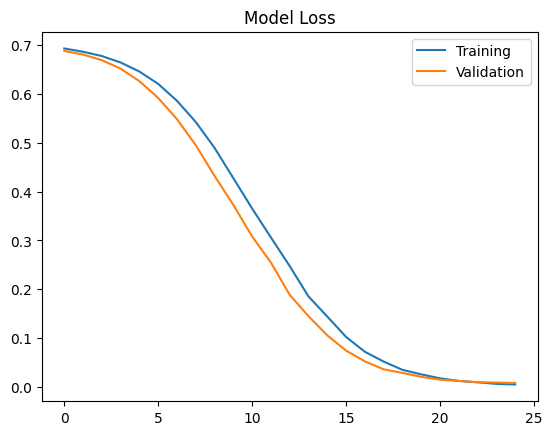

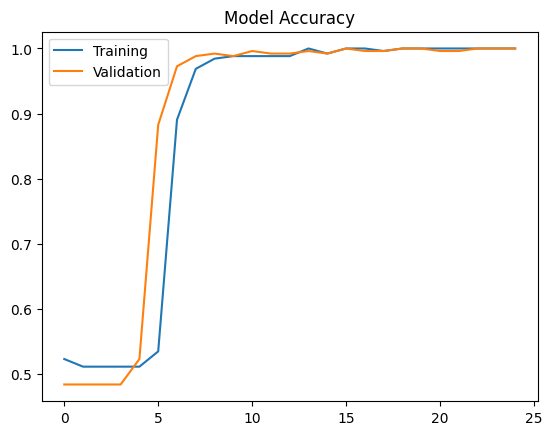

In [9]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()